<a href="https://colab.research.google.com/github/laura-cheesmanhaynes/DSDA-Data-Visualisation/blob/main/Data_Visualisation_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 1: Sales Data Analysis**

**Objective**: Analyze sales data to identify trends, seasonality, and outliers.

**Data**: Monthly sales data for a retail company over five years, including change in sales value.

**Tasks**:

Plot monthly sales over the five-year period to visualize trends and seasonality.
Create a box plot to identify any outliers in monthly sales data.

**Data Access**:
For this exercise, you can use the "Monthly State Retail Sales" (*Not Adjusted State Retail Sales Year-over-Year Percentage Changes* called as "state_retail_yy.csv") data from the U.S. Census Bureau. This data includes state-level retail sales figures, starting from January 2019, and covers various retail sectors. It's a comprehensive dataset that can be used to analyze trends, seasonality, and outliers in retail sales across different states and sectors. The data is updated regularly and available in CSV format, which is convenient for analysis in Python using libraries like Pandas and Matplotlib.

Link to data set: https://www.census.gov/retail/state_retail_sales.html

Note: 'naics' in the data stands for North American Industry Classification System (naics)

**Solution -->**

In [2]:
# Step 1: Mount Google Drive
# This will prompt for authorization to access your drive.
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import pandas as pd

# Make sure to replace 'your_path_here' with the actual path to the CSV file in your Google Drive
file_path = '/content/drive/My Drive/YSJ-DataVis/state_retail_yy.csv'

# Reading the data from the CSV file into a pandas DataFrame.
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/YSJ-DataVis/state_retail_yy.csv'

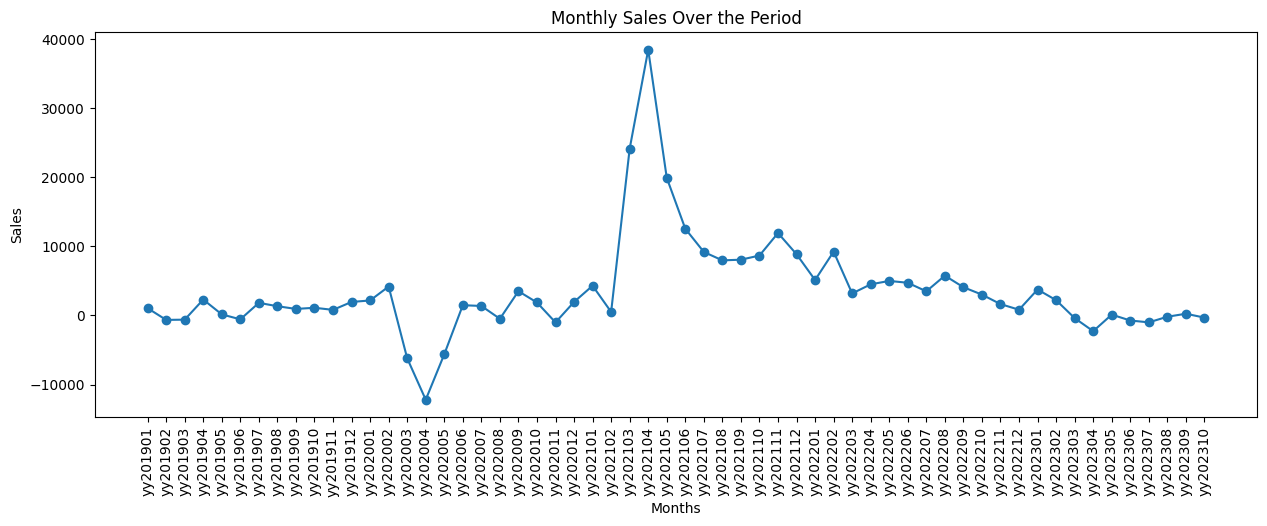

In [ ]:
import matplotlib.pyplot as plt

# Convert all monthly sales data to numeric, forcing non-numeric to NaN, then fill with 0
monthly_sales_columns = [col for col in df if col.startswith('yy')]
df[monthly_sales_columns] = df[monthly_sales_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Now sum the sales for each month
monthly_sales = df[monthly_sales_columns].sum()

# Plot the monthly sales
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Over the Period')
plt.ylabel('Sales')
plt.xlabel('Months')
plt.xticks(rotation=90)
plt.show()

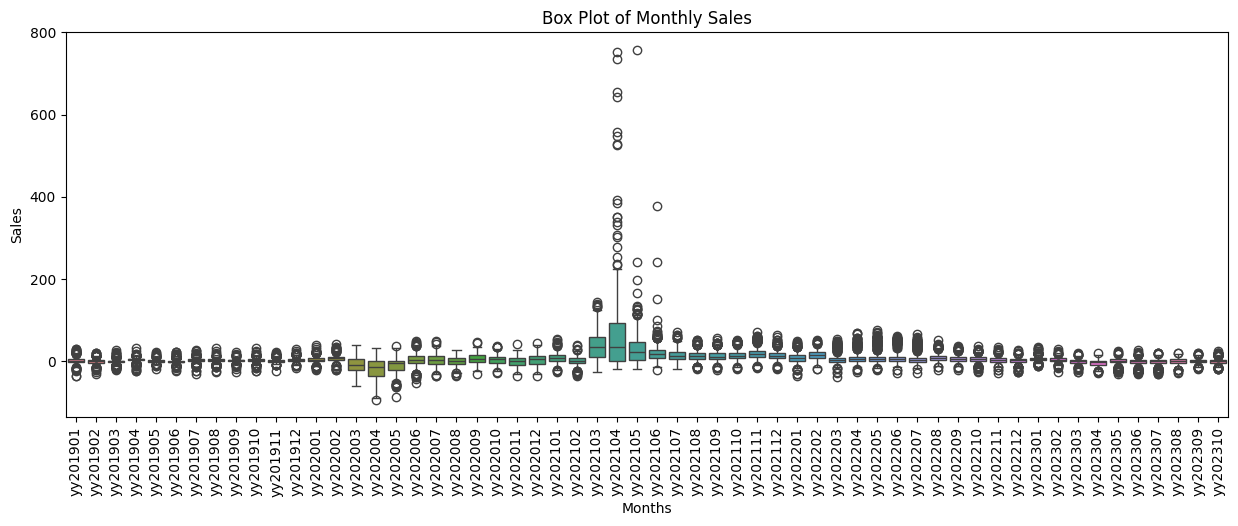

In [ ]:
import seaborn as sns

# The same monthly_sales_columns are used here
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[monthly_sales_columns])
plt.title('Box Plot of Monthly Sales')
plt.ylabel('Sales')
plt.xlabel('Months')
plt.xticks(rotation=90)
plt.show()

**Disclaimer: The following is not a financial advice and for educational purposes only!**

**Exercise 1: Time Series Analysis of Stock Prices**

**Objective**: Analyze stock price trends and moving averages.

**Data**: Daily closing prices of a stock over the past two years.

**Tasks**:

Plot the daily closing prices to visualize the overall trend.
Calculate and plot 30-day and 90-day moving averages to identify short-term and long-term trends.

**Data Set Access**: We can download the data of stocks and indexes such as FTSE 250 from https://sharecast.com/index/ftse_250/prices/download
and FTSE 100 from https://sharecast.com/index/ftse_100/prices/download

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00


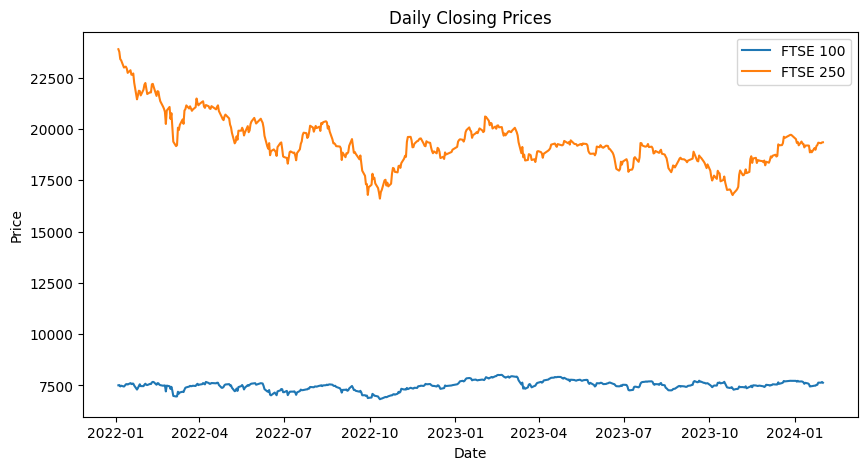

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# Load data
file_path_ftse100_data = '/content/drive/My Drive/YSJ-DataVis/FTSE100-22_24.csv'
file_path_ftse250_data = '/content/drive/My Drive/YSJ-DataVis/FTSE250-22_24.csv'

# Read data into DataFrame
ftse100_data = pd.read_csv(file_path_ftse100_data, parse_dates=['Date'])
ftse250_data = pd.read_csv(file_path_ftse250_data, parse_dates=['Date'])

# Merge the datasets on 'Date' column
merged_data = pd.merge(ftse100_data, ftse250_data, on='Date', suffixes=('_FTSE100', '_FTSE250'))

# Plot daily closing prices
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Date'], merged_data['Close Price_FTSE100'], label='FTSE 100')
plt.plot(merged_data['Date'], merged_data['Close Price_FTSE250'], label='FTSE 250')
plt.title('Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

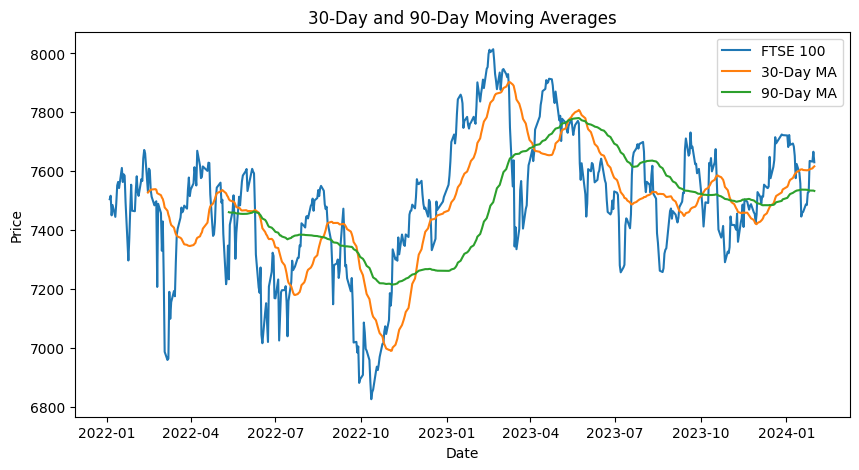

In [ ]:
# Calculate 30-day and 90-day moving averages
ftse100_data['30-Day MA'] = ftse100_data['Close Price'].rolling(window=30).mean()
ftse100_data['90-Day MA'] = ftse100_data['Close Price'].rolling(window=90).mean()


# Plot 30-day and 90-day moving averages
plt.figure(figsize=(10, 5))
plt.plot(ftse100_data['Date'], ftse100_data['Close Price'], label='FTSE 100')
plt.plot(ftse100_data['Date'], ftse100_data['30-Day MA'], label='30-Day MA')
plt.plot(ftse100_data['Date'], ftse100_data['90-Day MA'], label='90-Day MA')
plt.title('30-Day and 90-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

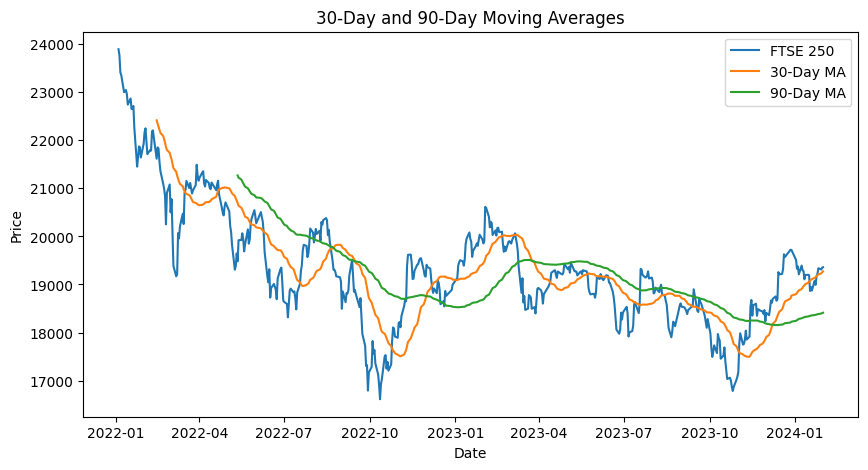

In [ ]:

# Calculate 30-day and 90-day moving averages
ftse250_data['30-Day MA'] = ftse250_data['Close Price'].rolling(window=30).mean()
ftse250_data['90-Day MA'] = ftse250_data['Close Price'].rolling(window=90).mean()


# Plot 30-day and 90-day moving averages
plt.figure(figsize=(10, 5))
plt.plot(ftse250_data['Date'], ftse250_data['Close Price'], label='FTSE 250')
plt.plot(ftse250_data['Date'], ftse250_data['30-Day MA'], label='30-Day MA')
plt.plot(ftse250_data['Date'], ftse250_data['90-Day MA'], label='90-Day MA')
plt.title('30-Day and 90-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

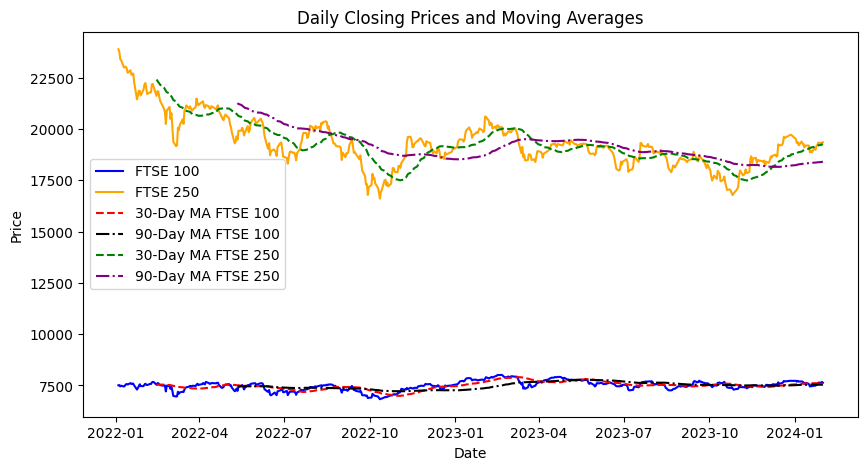

In [ ]:
# Calculate moving averages
merged_data['30D_MA_FTSE100'] = merged_data['Close Price_FTSE100'].rolling(window=30).mean()
merged_data['90D_MA_FTSE100'] = merged_data['Close Price_FTSE100'].rolling(window=90).mean()
merged_data['30D_MA_FTSE250'] = merged_data['Close Price_FTSE250'].rolling(window=30).mean()
merged_data['90D_MA_FTSE250'] = merged_data['Close Price_FTSE250'].rolling(window=90).mean()

# Plot daily closing prices and moving averages
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Date'], merged_data['Close Price_FTSE100'], label='FTSE 100', color='blue')
plt.plot(merged_data['Date'], merged_data['Close Price_FTSE250'], label='FTSE 250', color='orange')
plt.plot(merged_data['Date'], merged_data['30D_MA_FTSE100'], label='30-Day MA FTSE 100', linestyle='--', color='red')
plt.plot(merged_data['Date'], merged_data['90D_MA_FTSE100'], label='90-Day MA FTSE 100', linestyle='-.', color='black')
plt.plot(merged_data['Date'], merged_data['30D_MA_FTSE250'], label='30-Day MA FTSE 250', linestyle='--', color='green')
plt.plot(merged_data['Date'], merged_data['90D_MA_FTSE250'], label='90-Day MA FTSE 250', linestyle='-.', color='purple')
plt.title('Daily Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()